# IE582 - Homework 2

## Zelina Genel - 2023802015

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_data = pd.read_csv("/Users/zelina/Desktop/IE582/HW2/match_data.csv")

After uploading the match data, we delete rows where "suspended" or "stopped" values are True.

In [3]:
filt_match_data_ss = match_data[~(match_data["suspended"] | match_data["stopped"])]

Since we are asked to perform tasks for each half, we divide the filtered dataset into two, separating 1st half and 2nd half data.

In [4]:
first_half_df = filt_match_data_ss[filt_match_data_ss["halftime"] == "1st-half"]
second_half_df = filt_match_data_ss[filt_match_data_ss["halftime"] == "2nd-half"]

Before moving forward, check missing values of odds in filtered data.

In [5]:
missing_values = first_half_df[["1", "2", "X"]].isna().sum()
print("Missing values 1, X, 2:")
print(missing_values)

missing_values = second_half_df[["1", "2", "X"]].isna().sum()
print("Missing values 1, X, 2:")
print(missing_values)

Missing values 1, X, 2:
1    0
2    0
X    0
dtype: int64
Missing values 1, X, 2:
1    0
2    0
X    0
dtype: int64


There is no missing data in odd columns.

In [6]:
# number of games 
unique_ngame = filt_match_data_ss["fixture_id"].nunique()
print(unique_ngame)

648


# Task 1

## 1. Calculate probabilities as inverse of odd values

Calculating probabilities as inverse of odd values for 1st half;

In [7]:
# probabilities based on odd

first_half_df["p_home_win"] = 1/first_half_df["1"]
first_half_df["p_away_win"] = 1/first_half_df["2"]
first_half_df["p_tie"] = 1/first_half_df["X"]

/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/1391180215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_df["p_home_win"] = 1/first_half_df["1"]
/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/1391180215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_df["p_away_win"] = 1/first_half_df["2"]
/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/1391180215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Calculating probabilities as inverse of odd values for 2nd half;

In [8]:
second_half_df["p_home_win"] = 1/second_half_df["1"]
second_half_df["p_away_win"] = 1/second_half_df["2"]
second_half_df["p_tie"] = 1/second_half_df["X"]

/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/3515644801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_half_df["p_home_win"] = 1/second_half_df["1"]
/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/3515644801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_half_df["p_away_win"] = 1/second_half_df["2"]
/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/3515644801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

## 2. Calculate normalized probabilities

Calculating normalized probabilities for 1st half;

In [9]:
# normalized probabilities
first_half_df["p_total"] = first_half_df["p_home_win"] + first_half_df["p_tie"] + first_half_df["p_away_win"]
first_half_df["p_home_win_norm"] = first_half_df["p_home_win"]/first_half_df["p_total"]
first_half_df["p_away_win_norm"] = first_half_df["p_away_win"]/first_half_df["p_total"]
first_half_df["p_tie_norm"] = first_half_df["p_tie"]/first_half_df["p_total"]

/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/3436362271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_df["p_total"] = first_half_df["p_home_win"] + first_half_df["p_tie"] + first_half_df["p_away_win"]
/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/3436362271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_df["p_home_win_norm"] = first_half_df["p_home_win"]/first_half_df["p_total"]
/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4

Calculating normalized probabilities for 2nd half;

In [13]:
second_half_df["p_total"] = second_half_df["p_home_win"] + second_half_df["p_tie"] + second_half_df["p_away_win"]
second_half_df["p_home_win_norm"] = second_half_df["p_home_win"]/second_half_df["p_total"]
second_half_df["p_away_win_norm"] = second_half_df["p_away_win"]/second_half_df["p_total"]
second_half_df["p_tie_norm"] = second_half_df["p_tie"]/second_half_df["p_total"]

/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/2508451568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_half_df["p_total"] = second_half_df["p_home_win"] + second_half_df["p_tie"] + second_half_df["p_away_win"]
/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/2508451568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_half_df["p_home_win_norm"] = second_half_df["p_home_win"]/second_half_df["p_total"]
/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipyk

## 3. Plot p(home_win)-p(away_win) vs p(tie) 

Calculate the difference between P(home win) and P(away win) for 1st half

In [24]:
first_half_df["p_home_minus_away"] = first_half_df["p_home_win"] - first_half_df["p_away_win"]

/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/682054308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_df["p_home_minus_away"] = first_half_df["p_home_win"] - first_half_df["p_away_win"]


Plot P(home win) - P(away win) on x-axis and P(tie) on y-axis for 1st half

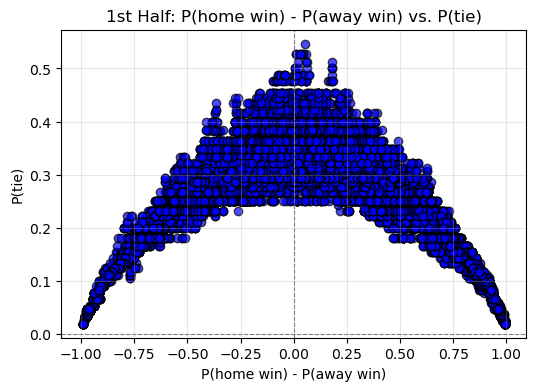

In [26]:
plt.figure(figsize=(6, 4))
plt.scatter(first_half_df["p_home_minus_away"], first_half_df["p_tie"], alpha=0.7, color='blue', edgecolor='k')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  

plt.xlabel("P(home win) - P(away win)")
plt.ylabel("P(tie)")
plt.title("1st Half: P(home win) - P(away win) vs. P(tie)")

plt.grid(alpha=0.3)
plt.show()

Calculate the difference between P(home win) and P(away win) for 2nd half;

In [27]:
second_half_df["p_home_minus_away"] = second_half_df["p_home_win"] - second_half_df["p_away_win"]

/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/1702907173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_half_df["p_home_minus_away"] = second_half_df["p_home_win"] - second_half_df["p_away_win"]


Plot P(home win) - P(away win) on x-axis and P(tie) on y-axis for 2nd half

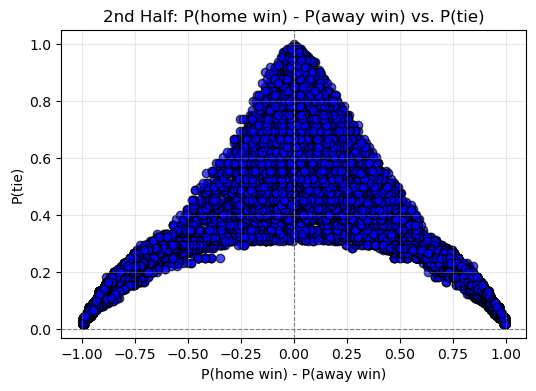

In [28]:
plt.figure(figsize=(6, 4))
plt.scatter(second_half_df["p_home_minus_away"], second_half_df["p_tie"], alpha=0.7, color='blue', edgecolor='k')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  

plt.xlabel("P(home win) - P(away win)")
plt.ylabel("P(tie)")
plt.title("2nd Half: P(home win) - P(away win) vs. P(tie)")

plt.grid(alpha=0.3)
plt.show()

Defining bins from 0 to 1 with a step of 0.05 to count game numbers within;

In [29]:
bins = np.arange(0, 1.05, 0.05)  # Include 1.0 in the range
bin_labels = [f"({bins[i]:.2f}, {bins[i+1]:.2f}]" for i in range(len(bins) - 1)]

Categorize the probabilities into bins for 1st half;

In [30]:
first_half_df["bin"] = pd.cut(first_half_df["p_tie_norm"], bins=bins, labels=bin_labels, include_lowest=True)

/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/3362598363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_df["bin"] = pd.cut(first_half_df["p_tie_norm"], bins=bins, labels=bin_labels, include_lowest=True)


Group by bins and result to count outcomes in each bin;

In [31]:
bin_result_counts = first_half_df.groupby(["bin", "result"], observed=False).size().unstack(fill_value=0)

Calculating total games in all bins and normalizing counts of each outcome by bin total to see how many games fall into
bin and what fraction of them are home_win, draw or away_win for 1st half.

In [32]:
bin_result_counts["total"] = bin_result_counts.sum(axis=1)
bin_result_counts["draw_fraction"] = bin_result_counts["X"] / bin_result_counts["total"]
bin_result_counts["home_win_fraction"] = bin_result_counts["1"] / bin_result_counts["total"]
bin_result_counts["away_win_fraction"] = bin_result_counts["2"] / bin_result_counts["total"]

In [33]:
# View the result
print(bin_result_counts)

result           1     2     X  total  draw_fraction  home_win_fraction  \
bin                                                                       
(0.00, 0.05]   409   207    53    669       0.079223           0.611360   
(0.05, 0.10]   855   330    75   1260       0.059524           0.678571   
(0.10, 0.15]  1239   575   195   2009       0.097063           0.616725   
(0.15, 0.20]  1750   943   503   3196       0.157384           0.547559   
(0.20, 0.25]  2127  1547  1256   4930       0.254767           0.431440   
(0.25, 0.30]  3460  2839  2779   9078       0.306125           0.381141   
(0.30, 0.35]  2153  1754  1951   5858       0.333049           0.367532   
(0.35, 0.40]   661   503   657   1821       0.360791           0.362987   
(0.40, 0.45]    89    85   111    285       0.389474           0.312281   
(0.45, 0.50]     0     4    37     41       0.902439           0.000000   
(0.50, 0.55]     0     0     1      1       1.000000           0.000000   
(0.55, 0.60]     0     0 

Categorize the probabilities into bins for 2nd half;

In [34]:
second_half_df["bin"] = pd.cut(second_half_df["p_tie_norm"], bins=bins, labels=bin_labels, include_lowest=True)

/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/2544697480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_half_df["bin"] = pd.cut(second_half_df["p_tie_norm"], bins=bins, labels=bin_labels, include_lowest=True)


Group by bins and result to count outcomes in each bin for 2nd half;

In [35]:
bin_result_counts_2 = second_half_df.groupby(["bin", "result"], observed=False).size().unstack(fill_value=0)

Calculating total games in all bins and normalizing counts of each outcome by bin total to see how many games fall into bin and what fraction of them are home_win, draw or away_win for 2nd half.

In [36]:
bin_result_counts_2["total"] = bin_result_counts_2.sum(axis=1)
bin_result_counts_2["draw_fraction"] = bin_result_counts_2["X"] / bin_result_counts_2["total"]
bin_result_counts_2["home_win_fraction"] = bin_result_counts_2["1"] / bin_result_counts_2["total"]
bin_result_counts_2["away_win_fraction"] = bin_result_counts_2["2"] / bin_result_counts_2["total"]

In [37]:
# View the result
print(bin_result_counts_2)

result           1     2    X  total  draw_fraction  home_win_fraction  \
bin                                                                      
(0.00, 0.05]  1926  1223   76   3225       0.023566           0.597209   
(0.05, 0.10]  1868  1313  230   3411       0.067429           0.547640   
(0.10, 0.15]  1603   831  365   2799       0.130404           0.572705   
(0.15, 0.20]  1313  1040  618   2971       0.208011           0.441939   
(0.20, 0.25]   982   700  572   2254       0.253771           0.435670   
(0.25, 0.30]   904   678  513   2095       0.244869           0.431504   
(0.30, 0.35]   562   344  398   1304       0.305215           0.430982   
(0.35, 0.40]   423   332  563   1318       0.427162           0.320941   
(0.40, 0.45]   523   378  702   1603       0.437929           0.326263   
(0.45, 0.50]   459   306  582   1347       0.432071           0.340757   
(0.50, 0.55]   286   253  630   1169       0.538922           0.244654   
(0.55, 0.60]   197   135  502    834  

Define bins from -1 to 1 with a step of 0.05 for 1st half to compare with p(home_win)-p(away_win) vs p(tie) plot;

In [43]:
bins_minus = np.arange(-1, 1.2, 0.2)  
bin_labels_minus = [f"({bins_minus[i]:.2f}, {bins_minus[i+1]:.2f}]" for i in range(len(bins_minus) - 1)]
# Categorize the probabilities into bins
first_half_df["bin_minus"] = pd.cut(first_half_df["p_home_minus_away"], bins=bins_minus, labels=bin_labels_minus, include_lowest=True)

# Group by bins and result to count outcomes in each bin
bin_result_counts_minus = first_half_df.groupby(["bin_minus", "result"], observed=False).size().unstack(fill_value=0)

# Add totals for each bin and normalize counts by bin total
bin_result_counts_minus["total"] = bin_result_counts_minus.sum(axis=1)
bin_result_counts_minus["draw_fraction"] = bin_result_counts_minus["X"] / bin_result_counts_minus["total"]
print(bin_result_counts_minus["draw_fraction"])

bin_minus
(-1.00, -0.80]    0.082907
(-0.80, -0.60]    0.165803
(-0.60, -0.40]    0.272727
(-0.40, -0.20]    0.274830
(-0.20, -0.00]    0.281860
(-0.00, 0.20]     0.360765
(0.20, 0.40]      0.353692
(0.40, 0.60]      0.270369
(0.60, 0.80]      0.141440
(0.80, 1.00]      0.088492
Name: draw_fraction, dtype: float64


/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/2149057810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_df["bin_minus"] = pd.cut(first_half_df["p_home_minus_away"], bins=bins_minus, labels=bin_labels_minus, include_lowest=True)


We overlay the datapoints that represent real probabilities of Draw game onto p(home_win)-p(away_win) vs p(tie) plot for 1st half;

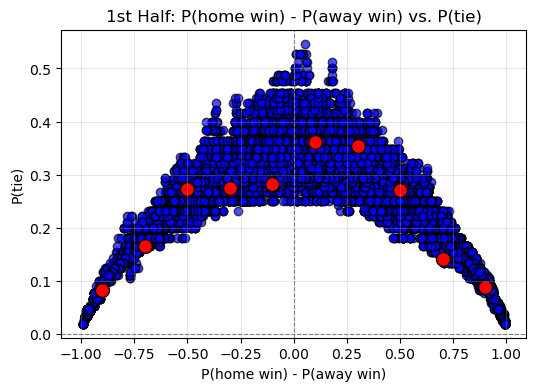

In [41]:
overlay_x = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]
overlay_y = [0.082907, 0.165803, 0.272727, 0.274830, 0.281860, 0.360765, 0.353692, 0.270369, 0.141440, 0.088492]

# Plot P(home win) - P(away win) on x-axis and P(tie) on y-axis
plt.figure(figsize=(6, 4))
plt.scatter(first_half_df["p_home_minus_away"], first_half_df["p_tie"], alpha=0.7, color='blue', edgecolor='k')

# Overlay additional data points
plt.scatter(overlay_x, overlay_y, alpha=1.0, color='red', edgecolor='black', s=100, label='Real Probabilities')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  

plt.xlabel("P(home win) - P(away win)")
plt.ylabel("P(tie)")
plt.title("1st Half: P(home win) - P(away win) vs. P(tie)")

plt.grid(alpha=0.3)
plt.show()

Repeating for 2nd half;

In [42]:
# Categorize the probabilities into bins
second_half_df["bin_minus"] = pd.cut(second_half_df["p_home_minus_away"], bins=bins_minus, labels=bin_labels_minus, include_lowest=True)

# Group by bins and result to count outcomes in each bin
bin_result_counts_minus_2 = second_half_df.groupby(["bin_minus", "result"]).size().unstack(fill_value=0)

# Add totals for each bin and normalize counts by bin total
bin_result_counts_minus_2["total"] = bin_result_counts_minus_2.sum(axis=1)
bin_result_counts_minus_2["draw_fraction"] = bin_result_counts_minus_2["X"] / bin_result_counts_minus_2["total"]

print(bin_result_counts_minus_2["draw_fraction"])

bin_minus
(-1.00, -0.80]    0.103505
(-0.80, -0.60]    0.230263
(-0.60, -0.40]    0.386364
(-0.40, -0.20]    0.453321
(-0.20, -0.00]    0.543131
(-0.00, 0.20]     0.601999
(0.20, 0.40]      0.414867
(0.40, 0.60]      0.223309
(0.60, 0.80]      0.243024
(0.80, 1.00]      0.083160
Name: draw_fraction, dtype: float64


/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/1090151784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_half_df["bin_minus"] = pd.cut(second_half_df["p_home_minus_away"], bins=bins_minus, labels=bin_labels_minus, include_lowest=True)
/var/folders/s4/ysq3xm291z73j3nbwgb_d8y00000gp/T/ipykernel_4821/1090151784.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_result_counts_minus_2 = second_half_df.groupby(["bin_minus", "result"]).size().unstack(fill_value=0)


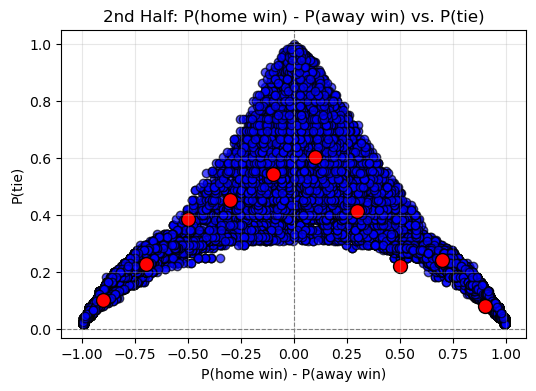

In [45]:
overlay_x2 = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]
overlay_y2 = [0.103505, 0.230263, 0.386364, 0.453321, 0.543131, 0.601999, 0.414867, 0.223309, 0.243024, 0.083160]

# Plot P(home win) - P(away win) on x-axis and P(tie) on y-axis
plt.figure(figsize=(6, 4))
plt.scatter(second_half_df["p_home_minus_away"], second_half_df["p_tie"], alpha=0.7, color='blue', edgecolor='k')

# Overlay additional data points
plt.scatter(overlay_x2, overlay_y2, alpha=1.0, color='red', edgecolor='black', s=100, label='Real Probabilities')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  

plt.xlabel("P(home win) - P(away win)")
plt.ylabel("P(tie)")
plt.title("2nd Half: P(home win) - P(away win) vs. P(tie)")

plt.grid(alpha=0.3)
plt.show()

# Task 2

Divide the dataset into two once again;

In [46]:
first_half_df_2 = match_data[match_data["halftime"] == "1st-half"]
second_half_df_2 = match_data[match_data["halftime"] == "2nd-half"]

Identify games with a red card in the first 15 minutes and remove them;

In [47]:
red_card_games = first_half_df_2[(first_half_df_2["minute"] <= 20) & ((first_half_df_2["Redcards - away"] == 1) | (first_half_df_2["Redcards - home"] == 1))]["fixture_id"].unique()

# Remove these games from the dataset
first_half_df_2_remove_red = first_half_df_2[~first_half_df_2["fixture_id"].isin(red_card_games)].reset_index(drop=True)

In [48]:
num_removed_games_red = len(red_card_games)
print(num_removed_games_red)

6


Only 6 games are removed.

Identify games with a goal in the last ~5 minutes;

In [49]:
goal_games = second_half_df_2[(second_half_df_2["minute"] >= 40) & ((second_half_df_2["Score Change - away"] == 1) 
                                                                    | (second_half_df_2["Score Change - home"] == 1))]["fixture_id"].unique()
# Remove these games from the dataset
second_half_df_2_remove_goal = second_half_df_2[~second_half_df_2["fixture_id"].isin(goal_games)].reset_index(drop=True)

In [50]:
num_removed_games_goal = len(goal_games)
print(num_removed_games_goal)

229


Removed 229 games.

Recalculate probabilities based on odds for 1st half and 2nd half after removal;

In [51]:
first_half_df_2_remove_red["p_home_win"] = 1/first_half_df_2_remove_red["1"]
first_half_df_2_remove_red["p_away_win"] = 1/first_half_df_2_remove_red["2"]
first_half_df_2_remove_red["p_tie"] = 1/first_half_df_2_remove_red["X"]

In [52]:
second_half_df_2_remove_goal["p_home_win"] = 1/second_half_df_2_remove_goal["1"]
second_half_df_2_remove_goal["p_away_win"] = 1/second_half_df_2_remove_goal["2"]
second_half_df_2_remove_goal["p_tie"] = 1/second_half_df_2_remove_goal["X"]

Calculate the difference between P(home win) and P(away win) for 1st half after removal;

In [53]:
first_half_df_2_remove_red["p_home_minus_away"] = first_half_df_2_remove_red["p_home_win"] - first_half_df_2_remove_red["p_away_win"]

Plot P(home win) - P(away win) on x-axis and P(tie) on y-axis and real probabilities of Draw 
for 1st half after removal;

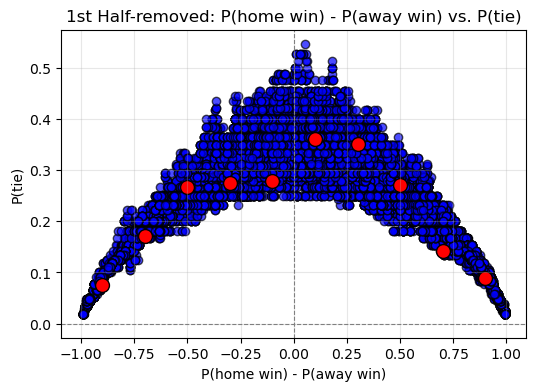

In [64]:
overlay_x3 = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]
overlay_y3 = [0.075881, 0.171190, 0.266027, 0.274446, 0.278935, 0.361219, 0.350442, 0.270294, 0.141387, 0.089564]
# Plot P(home win) - P(away win) on x-axis and P(tie) on y-axis for 1st half
plt.figure(figsize=(6, 4))
plt.scatter(first_half_df_2_remove_red["p_home_minus_away"], first_half_df_2_remove_red["p_tie"], alpha=0.7, color='blue', edgecolor='k')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  

plt.scatter(overlay_x3, overlay_y3, alpha=1.0, color='red', edgecolor='black', s=100, label='Real Probabilities')
# Add labels and title
plt.xlabel("P(home win) - P(away win)")
plt.ylabel("P(tie)")
plt.title("1st Half-removed: P(home win) - P(away win) vs. P(tie)")

# Show the plot
plt.grid(alpha=0.3)
plt.show()

Calculate the difference between P(home win) and P(away win) for 2nd half;

In [55]:
second_half_df_2_remove_goal["p_home_minus_away"] = second_half_df_2_remove_goal["p_home_win"] - second_half_df_2_remove_goal["p_away_win"]

Plot P(home win) - P(away win) on x-axis and P(tie) on y-axis and real probabilities of Draw 
for 2nd half after removal;

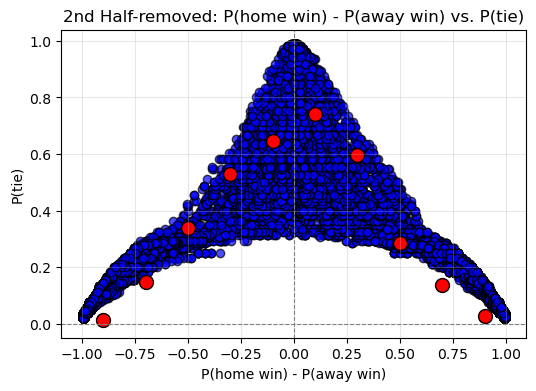

In [66]:
overlay_x4 = [-0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9]
overlay_y4 = [0.011953, 0.149219, 0.337192, 0.530070, 0.646821, 0.740000, 0.596052, 0.284173, 0.138439, 0.026003]
# Plot P(home win) - P(away win) on x-axis and P(tie) on y-axis
plt.figure(figsize=(6, 4))
plt.scatter(second_half_df_2_remove_goal["p_home_minus_away"], second_half_df_2_remove_goal["p_tie"], alpha=0.7, color='blue', edgecolor='k')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  

plt.scatter(overlay_x4, overlay_y4, alpha=1.0, color='red', edgecolor='black', s=100, label='Real Probabilities')

plt.xlabel("P(home win) - P(away win)")
plt.ylabel("P(tie)")
plt.title("2nd Half-removed: P(home win) - P(away win) vs. P(tie)")

plt.grid(alpha=0.3)
plt.show()

# Task 3

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [58]:
match_data = pd.read_csv("/Users/zelina/Desktop/IE582/HW2/match_data.csv")
first_half_df_3 = match_data[match_data["halftime"] == "1st-half"]

I selected some columns relevant to the outcome of the game to build the decision tree.

In [59]:
X = first_half_df_3[["Ball Possession % - home", "Ball Possession % - away", "Dangerous Attacks - home", "Dangerous Attacks - away",
                "Goal Attempts - home", "Goal Attempts - away", "Goals - home", "Goals - away", 
                "Penalties - home", "Penalties - away", "Redcards - home", "Redcards - away", 
                "Score Change - home", "Score Change - away", 
                "Successful Passes Percentage - home", "Successful Passes Percentage - away", 
                ]]  
y = first_half_df_3["result"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Initialize the model
tree = DecisionTreeClassifier(max_depth=4, random_state=42) 

# Train the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Visualize the tree. (Please note that this box is markdown since the output of code is not readible and I pasted the tree externally.)

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=X.columns, class_names=["1", "X", "2"], filled=True)
plt.show()

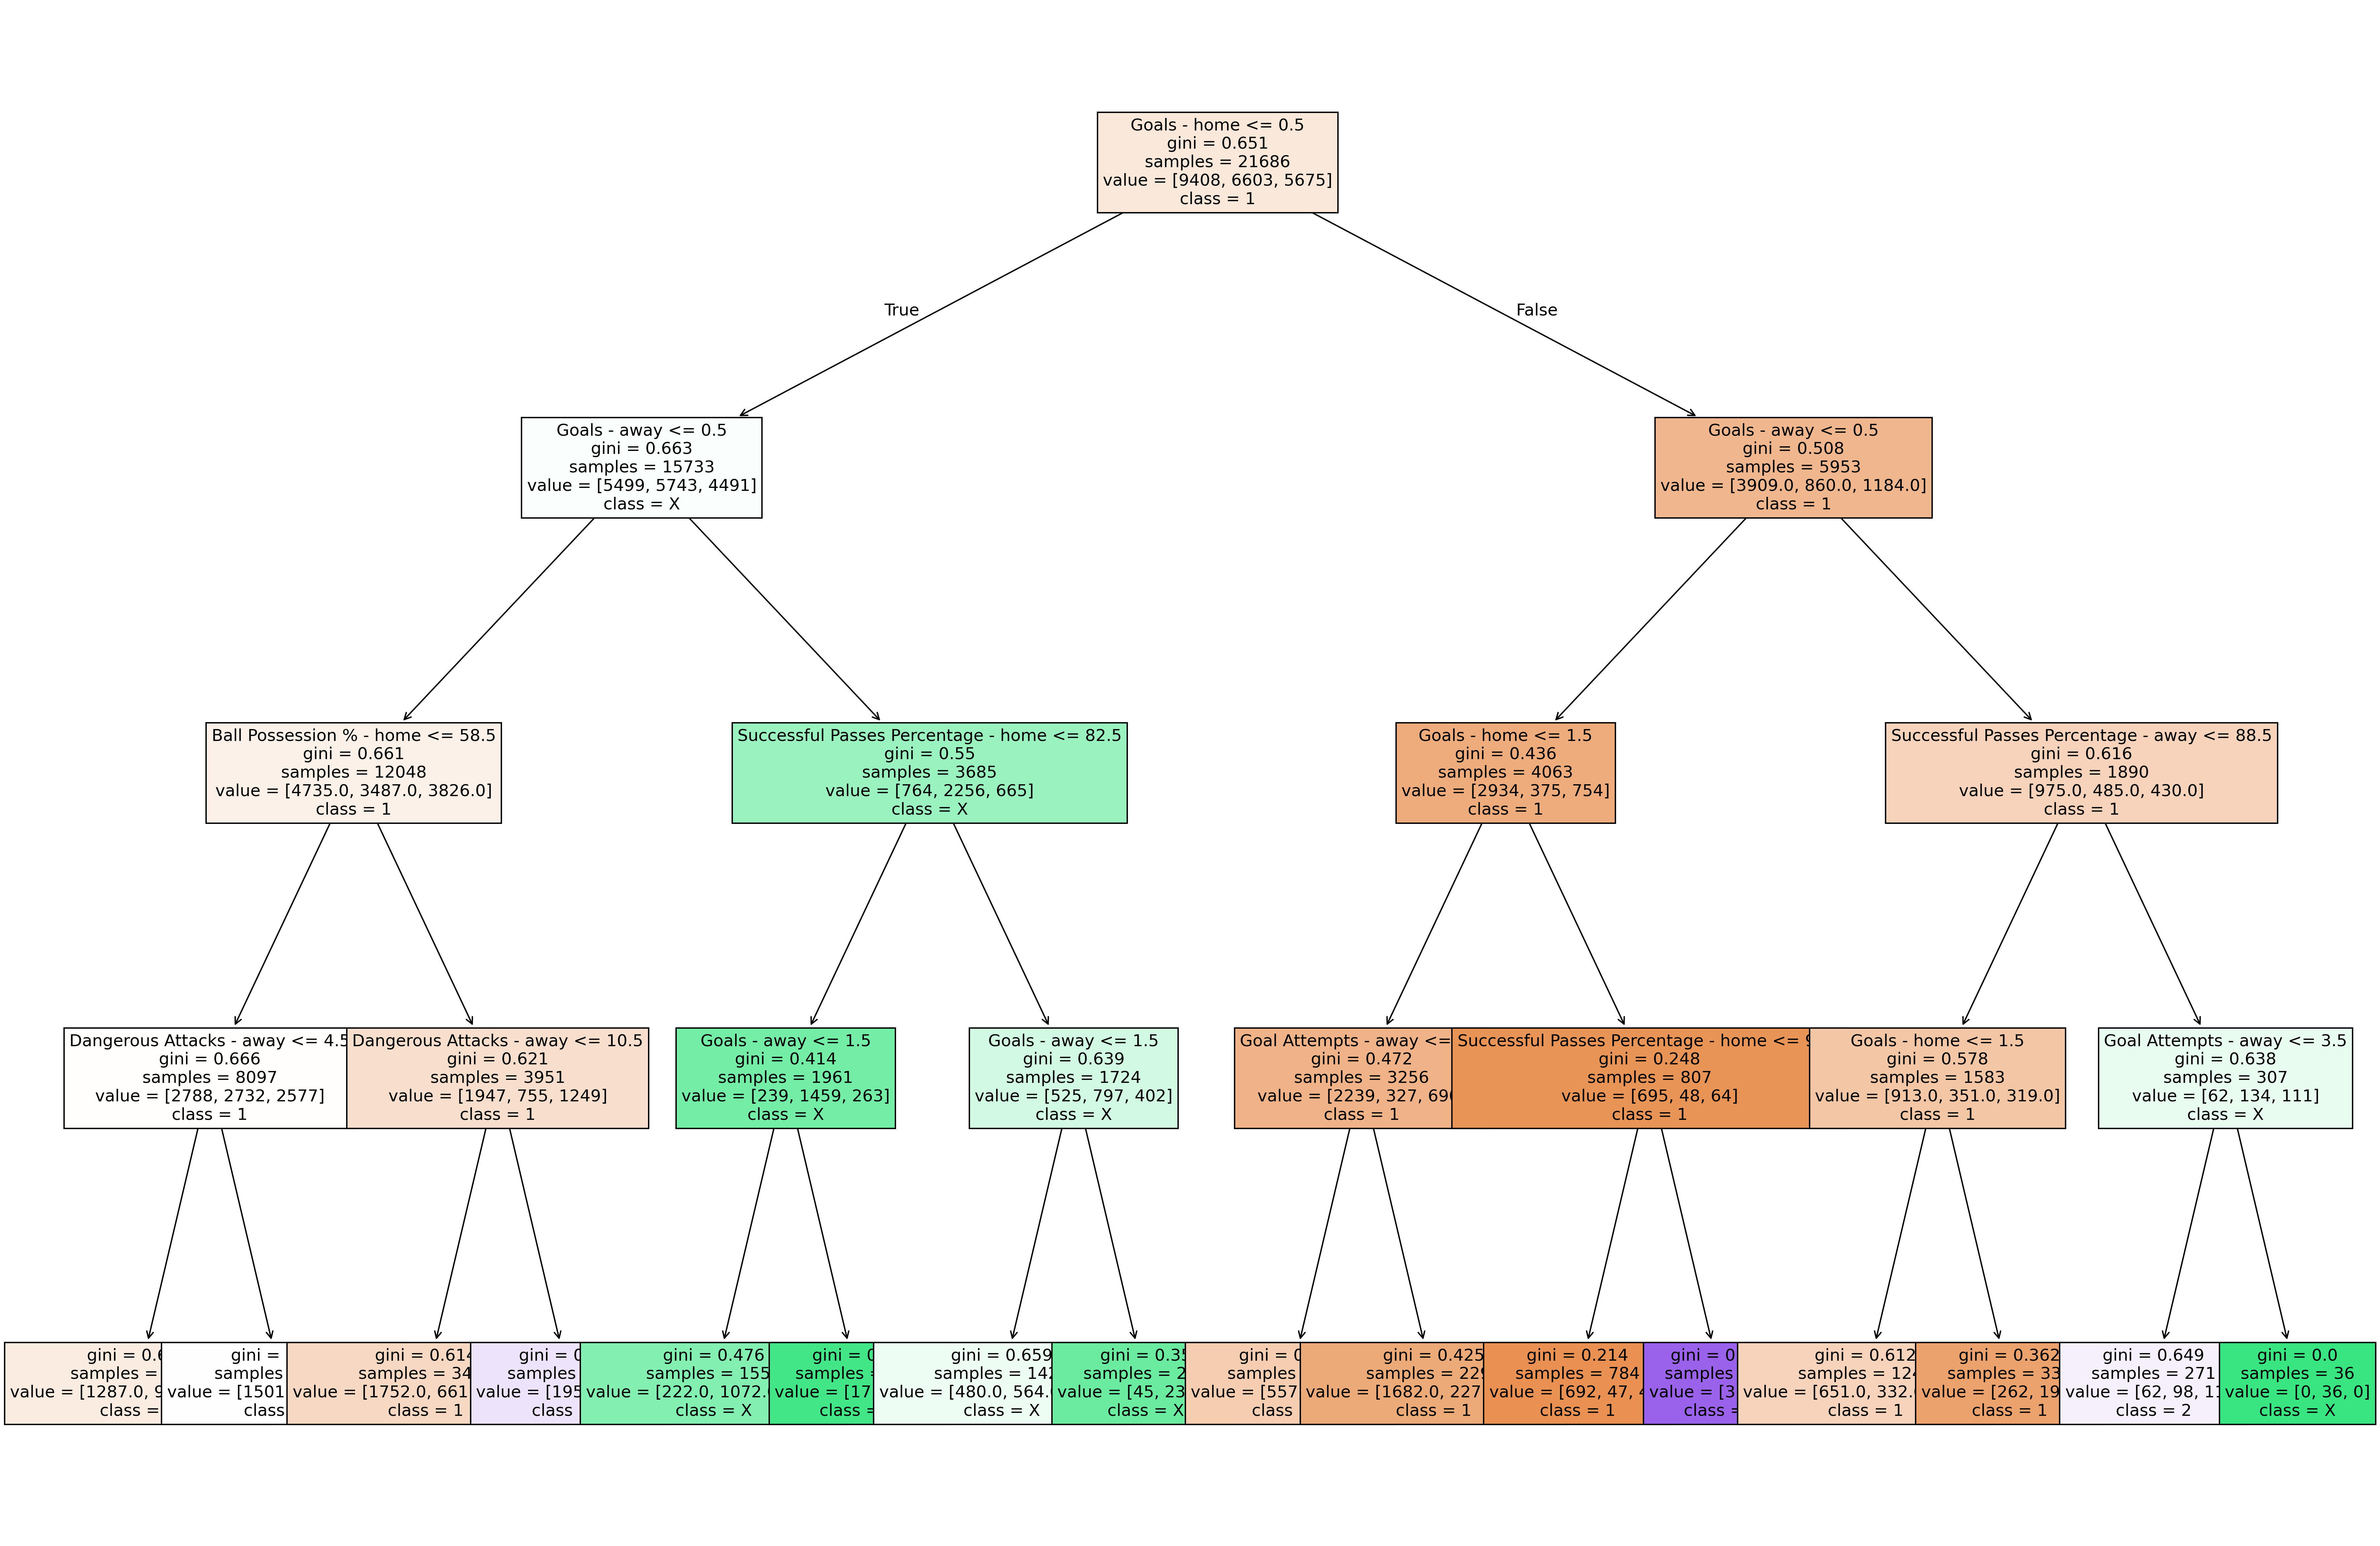

Making the tree for 2nd half;

In [68]:
second_half_df_3 = match_data[match_data["halftime"] == "2nd-half"]
X_2 = second_half_df_3[["Ball Possession % - home", "Ball Possession % - away", "Dangerous Attacks - home", "Dangerous Attacks - away",
                "Goal Attempts - home", "Goal Attempts - away", "Goals - home", "Goals - away", 
                "Penalties - home", "Penalties - away", "Redcards - home", "Redcards - away", 
                "Score Change - home", "Score Change - away", 
                "Successful Passes Percentage - home", "Successful Passes Percentage - away", 
                ]]  
y_2 = second_half_df_3["result"]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=42)




# Initialize the model
tree_2 = DecisionTreeClassifier(max_depth=4, random_state=42) 

# Train the model
tree_2.fit(X_train_2, y_train_2)

DecisionTreeClassifier(max_depth=4, random_state=42)

Visualize the tree

plt.figure(figsize=(15, 10))
plot_tree(tree_2, feature_names=X_2.columns, class_names=["1", "X", "2"], filled=True)
plt.show()

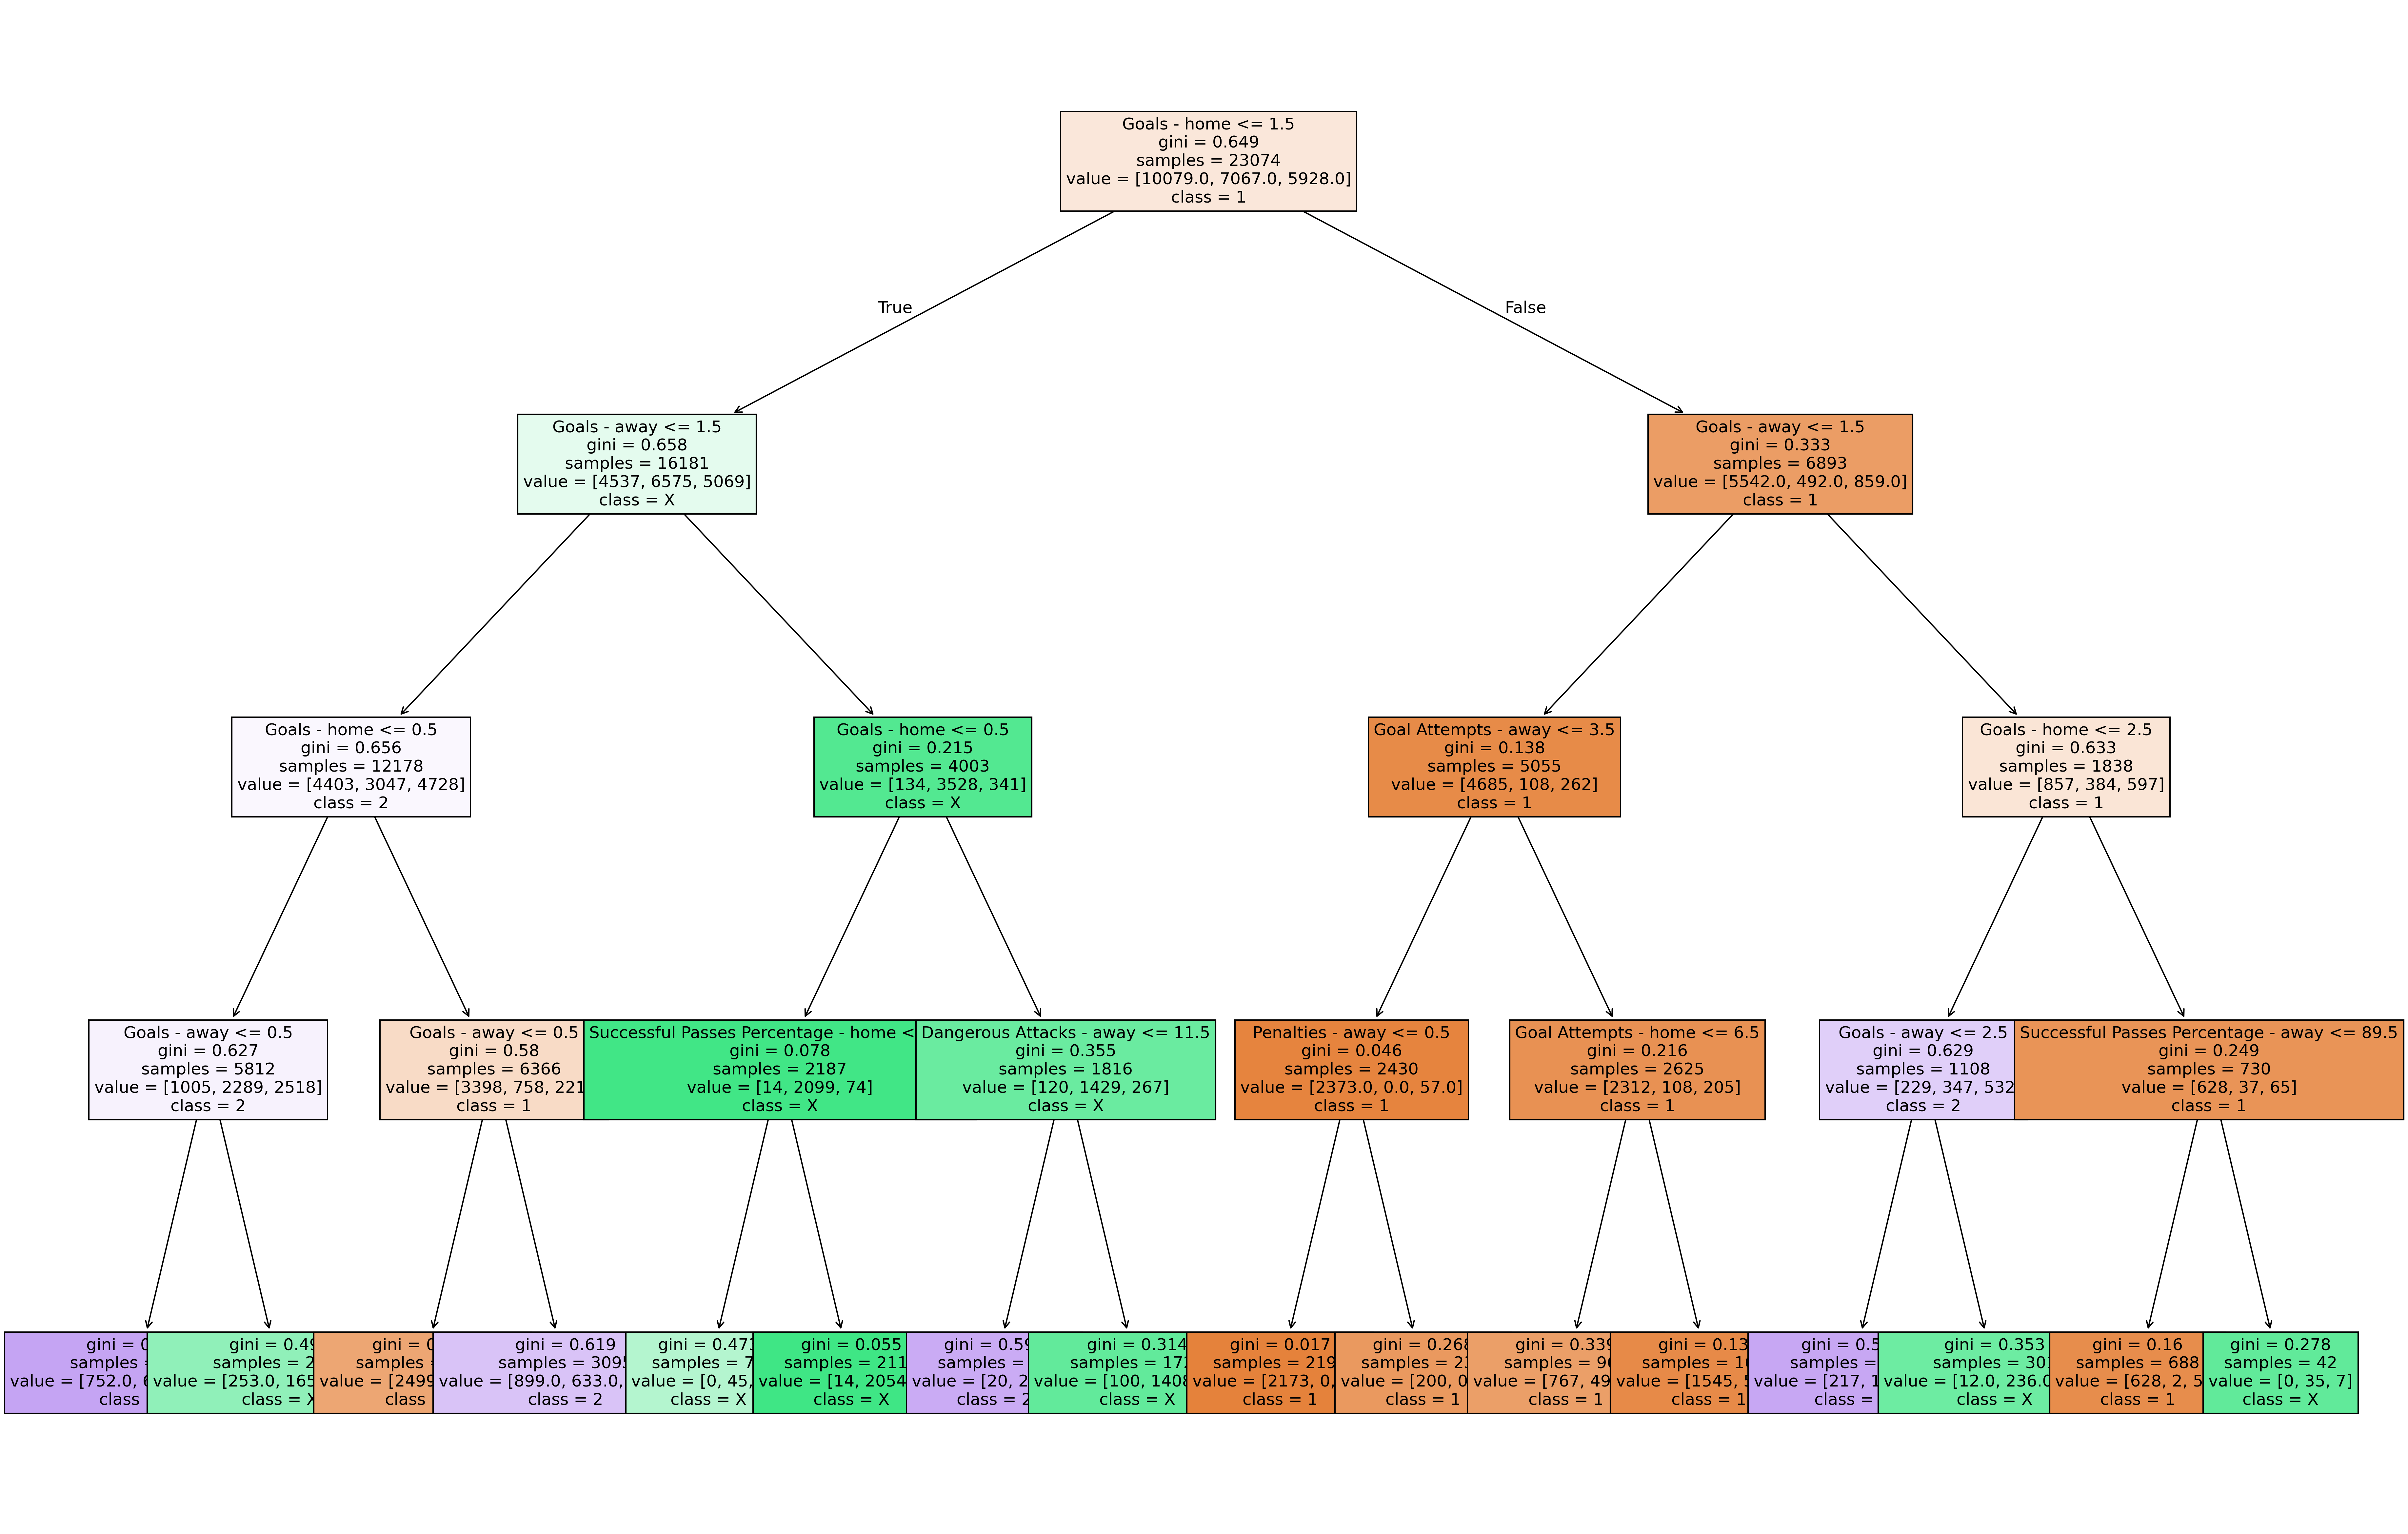

## References

For this homework, I used ChatGPT for coding assistance and some brief insights on decision trees. I also took a look at a submitted homework just to understand some parts of the tasks because the text of this assingment was very hard for me to understand. 